In [1]:
!unzip /content/creditcard.csv.zip

Archive:  /content/creditcard.csv.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: creditcard.csv          


In [2]:
import pandas as pd

In [47]:
df=pd.read_csv("/content/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [48]:
df.duplicated().sum()

1081

In [9]:
df.shape

(284807, 31)

In [49]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

#Exploratory Data Analysis (EDA)

In [11]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.utils import resample

In [69]:
fig = px.pie(data_frame = df,names = 'Class',title = 'Distribution of Classes',)
fig.show()

In [52]:
df['Class'] = df['Class'].astype(int)


In [53]:
print(df['Class'].unique())


[0 1]


In [54]:
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

print(df_majority.shape)  # Should return correct shape
print(df_minority.shape)  # Should return correct shape


(283253, 31)
(473, 31)


In [80]:
resampled_minority=resample(df_minority,replace=True,n_samples=len(df_majority))

In [81]:
df_upsampled=pd.concat([resampled_minority,df_majority])

In [82]:
df_upsampled.shape

(566506, 31)

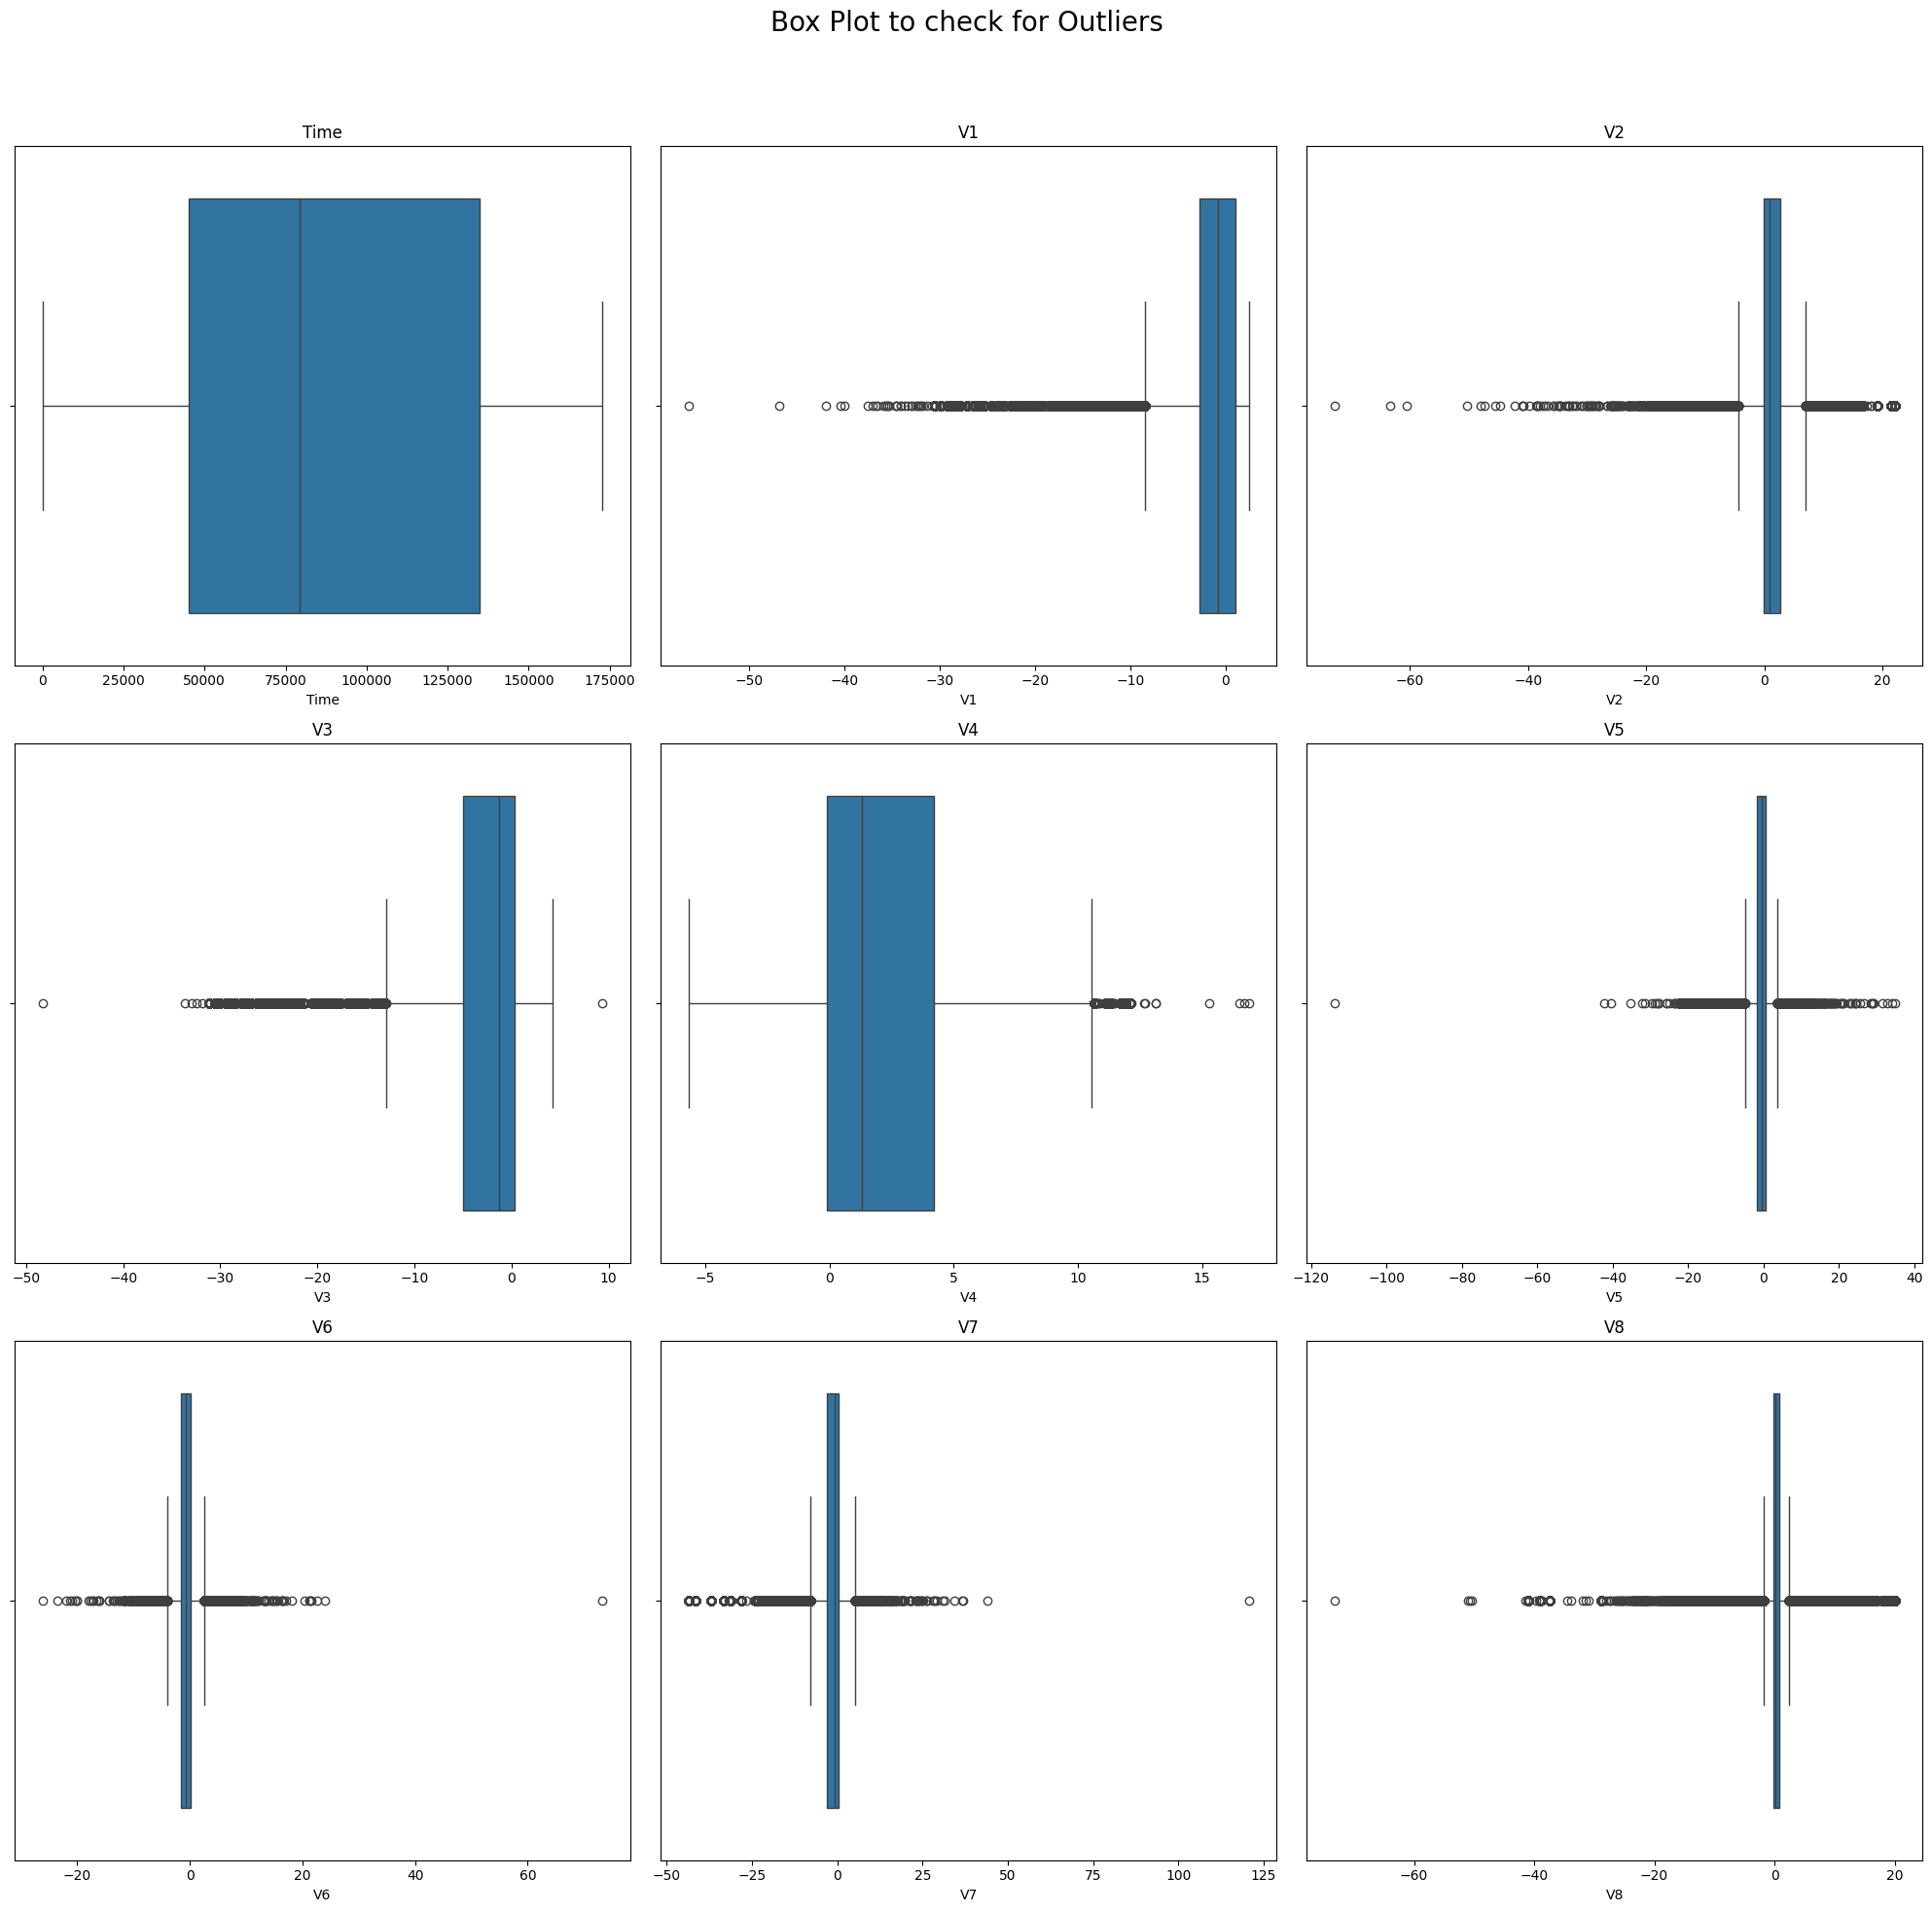

In [84]:
# Create a 3x3 grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()  # Flatten the array of axes to make indexing easier
fig.suptitle('Box Plot to check for Outliers', fontsize=20)

# Loop through the first 9 columns of the DataFrame and create a boxplot for each
for i, column in enumerate(df.columns[:9]):
    sns.boxplot(data=df_upsampled, x=column, ax=ax[i])
    ax[i].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title and avoid overlap
plt.show()


In [85]:
X=df_upsampled.drop('Class',axis=1)
y=df_upsampled['Class']

In [86]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(566506, 30) (453204, 30) (113302, 30) (453204,) (113302,)


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, classification_report, auc, ConfusionMatrixDisplay

In [93]:
# Thain the datasetwith Logistic Regression model
model_lgr = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
model_lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [94]:
# accuracy on training data
X_train_prediction = model_lgr.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', train_data_accuracy)

Accuracy on Training data :  0.9385596773197059


In [95]:
# accuracy on test data
X_test_prediction = model_lgr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9383947326613828


In [99]:
# Predict probabilities for the ROC Curve
y_probs = model_lgr.predict_proba(X_test)[:, 1]

# Predict classes for the Confusion Matrix
y_pred = model_lgr.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute ROC AUC score using continuous predictions (probabilities)
roc_auc = roc_auc_score(y_test, y_probs)

# Compute accuracy, precision, recall using binary class predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('ROC AUC Score:', roc_auc)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


ROC AUC Score: 0.9765434324521155
Accuracy: 0.9383947326613828
Precision: 0.9597889475145793
Recall: 0.9151294769730455


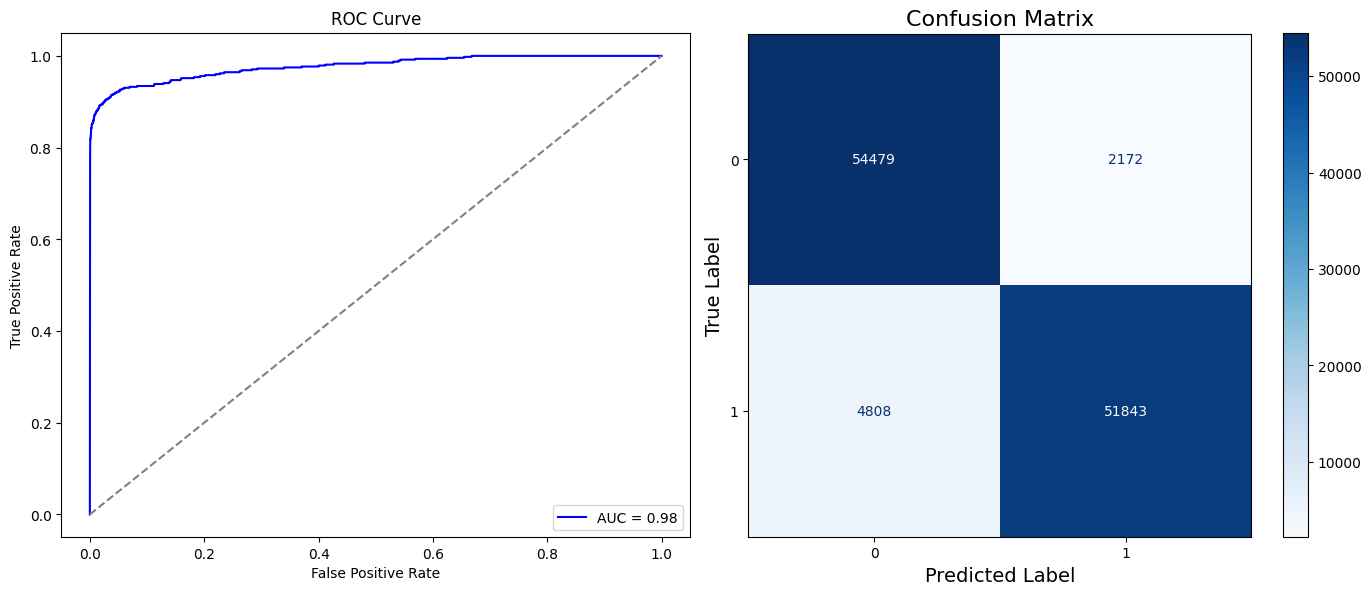

In [100]:
# Predict probabilities for the ROC Curve
y_probs = model_lgr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Predict classes for the Confusion Matrix
y_pred = model_lgr.predict(X_test)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_title('ROC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[1], cmap='Blues', values_format='d')
# Styling for Confusion Matrix
ax[1].set_title('Confusion Matrix', fontsize=16)
ax[1].set_xlabel('Predicted Label', fontsize=14)
ax[1].set_ylabel('True Label', fontsize=14)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#feature Importance

In [105]:
from sklearn.inspection import permutation_importance


# Compute permutation importance
result = permutation_importance(model_lgr, X_test, y_test, n_repeats=10, random_state=42, scoring='f1')

# Get mean and standard deviation of importance values
importance = result.importances_mean
std = result.importances_std

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance,
    'Std Dev': std
}).sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances:\n", importance_df)



Feature Importances:
    Feature  Importance   Std Dev
14     V14    0.141112  0.000402
4       V4    0.108861  0.000482
3       V3    0.098422  0.000593
12     V12    0.088755  0.000522
17     V17    0.061796  0.000598
10     V10    0.054986  0.000400
0     Time    0.023799  0.000444
16     V16    0.022465  0.000441
7       V7    0.017131  0.000371
11     V11    0.010941  0.000437
9       V9    0.009001  0.000376
5       V5    0.007351  0.000197
8       V8    0.007189  0.000287
6       V6    0.003747  0.000228
29  Amount    0.003187  0.000149
1       V1    0.002879  0.000211
21     V21    0.002107  0.000120
13     V13    0.002036  0.000088
25     V25    0.001538  0.000096
22     V22    0.001445  0.000066
23     V23    0.001299  0.000109
2       V2    0.001202  0.000073
18     V18    0.000983  0.000108
26     V26    0.000684  0.000090
19     V19    0.000428  0.000085
15     V15    0.000419  0.000122
28     V28    0.000112  0.000027
27     V27    0.000064  0.000031
20     V20    0.00000